En la siguiente sección se investigará y discutirá la pregunta:
¿Es posible predecir el género musical mediante variables X, Y y Z?
Para ello se utilizaran distinas técnicas de preprocesamiento y se usarán dos técnicas de clasificación:
    -K neighbors algorithm
    -Random Forest

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
##subimos la data
df_spotify = pd.read_csv('../data/data_principal.csv', encoding="UTF-8")

In [80]:
df_guitar = df_spotify[df_spotify['track_genre'] == 'songwriter']
print(df_guitar.head(2))

        Unnamed: 0                track_id          artists  \
102000      102000  0T5iIrXA4p5GsubkhuBIKV  Stephen Sanchez   
102001      102001  0NLkVxf0PyxsXBG3EuZcJf        Anuv Jain   

               album_name         track_name  popularity  duration_ms  \
102000  Until I Found You  Until I Found You          89       177720   
102001                Gul                Gul          71       217241   

        explicit  danceability  energy  ...  loudness  mode  speechiness  \
102000     False         0.539   0.508  ...    -6.050     1       0.0288   
102001     False         0.600   0.294  ...   -12.301     1       0.0292   

        acousticness  instrumentalness  liveness  valence    tempo  \
102000         0.727          0.000000     0.174    0.227  101.358   
102001         0.871          0.000087     0.102    0.342   86.970   

        time_signature  track_genre  
102000               3   songwriter  
102001               4   songwriter  

[2 rows x 21 columns]


Primero se comenzará con la técnica K-Neighbors y para ello se necesitará preprocesar los datos. Notemos que las columnas del data set no están escaladas, es decir, cada columna sigue su propia intervalo de valores, lo que complicará el uso del algoritmo de vecinos. A continuación escalaremos los datos mediante scaler = MinMaxScaler. Además, por la maldición de la dimensionalidad, es necesario tomar una cantidad menor de atributos.

In [27]:
##Escalando los datos y eliminando atributos

from sklearn.preprocessing import MinMaxScaler
print()

atributos1= [ 'tempo', 'danceability', 'loudness', 'energy','speechiness','acousticness','duration_ms']
y = df_spotify['track_genre']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_spotify[atributos1])


Luego de procesar los datos, se necesita encontrar el valor óptimo de K. Utilizaremos validación cruzada.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


param_grid = {'n_neighbors': list(range(1, 50))} 

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)


best_k = grid_search.best_params_['n_neighbors']
print(f"El mejor valor de k encontrado es: {best_k}")

best_knn_model = grid_search.best_estimator_


y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del mejor modelo k-NN en el conjunto de prueba: {accuracy}")

El mejor valor de k encontrado es: 1
Precisión del mejor modelo k-NN en el conjunto de prueba: 0.15824561403508772


In [103]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

##aplicando la técnica de los kneighbors
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
neigh_1 = KNeighborsClassifier(1)

neigh_1.fit(X_train, y_train)

y_pred_1 = neigh_1.predict(X_test)
acc_1= accuracy_score(y_test, y_pred_1)
print(acc_1)



0.32596491228070174


Podemos ver que esta técnica no tiene un índice de éxito alto, por lo tanto se puede proseguir de dos formas. La primera es preprocesar aún más los datos o bien cambiar el clasificador. Como la exactitud no es alta, no es necesario realizar una matriz de confusión.

Lo siguiente será probar con el clasificador Random Forest. Para esto, necesitamos crear un diccionario de los géneros musicales y así entregarle al clasificador menos clases para procesar. De la exploración sabemos que existen 114 géneros musicales. La decisión de cómo clasificar los géneros fue tomada por el equipo de trabajo.

In [ ]:
dic_generos = {
    'latin': ['latin', 'latino', 'reggaeton', 'spanish', 'tango'],
    'rock_clasico' :['rock', 'alt-rock', 'rock-n-roll', 'garage', 'rockabilly', 'psych-rock', 'j-rock'],
    'metal': ['death-metal', 'black-metal', 'heavy-metal', 'metal-core', 'grindcore', 'metal','metalcore'],
    'rock_intenso' : ['punk', 'punk-rock', 'hardcore', 'grunge', 'emo', 'goth', 'hard-rock'],
    'pop': [ 'pop', 'pop-film', 'power-pop','british','happy','comedy'],
    'pop-asia':['k-pop', 'j-pop', 'mandopop', 'cantopop', 'j-idol', 'j-dance','anime'],
    'hiphop': ['trip-hop', 'hip-hop'],
    'disco': ['groove', 'dance', 'dancehall','disco','funk'],
    'tech_club' : ['house', 'deep-house', 'minimal', 'minimal-techno','techno', 'chicago-house', 'detroit-techno', 'electro', 'club', 'hardstyle','edm'],
    'tech_exp' : ['dubstep', 'idm', 'breakbeat', 'electronic', 'industrial','afrobeat', 'drum-and-bass', 'dub', 'party'],
    'chill': ['study', 'ambient', 'acoustic', 'sleep', 'chill', 'trance', 'new-age','progressive-house','sad','guitar','ska', 'reggae'],
    'classic': ['opera', 'classical', 'piano','gospel','show-tunes','world-music'],
    'kids': ['kids', 'disney', 'children'],
    'country': ['bluegrass', 'honky-tonk','country'],
    'blues': ['soul', 'blues','r-n-b','jazz'],
    'other': ['singer-songwriter','songwriter'],
    'folklore': ['folk', 'turkish', 'iranian','indian','pagode','german','swedish','malay','french','romance'],
    'indie':['indie','alternative','indie-pop','synth-pop'],
    'brazil':['sertanejo', 'samba','brazil', 'forro', 'salsa','mpb']
}


# Expandimos el diccionario a un solo mapeo
mapeo_directo = {}
for genero_general, subgeneros in dic_generos.items():
    for sub in subgeneros:
        mapeo_directo[sub] = genero_general
df_spotify['genero_general'] = df_spotify['track_genre'].map(mapeo_directo)
generos_faltantes = df_spotify[df_spotify['genero_general'].isna()]['track_genre'].unique()
print("Géneros no mapeados:", generos_faltantes)


Géneros no mapeados: []


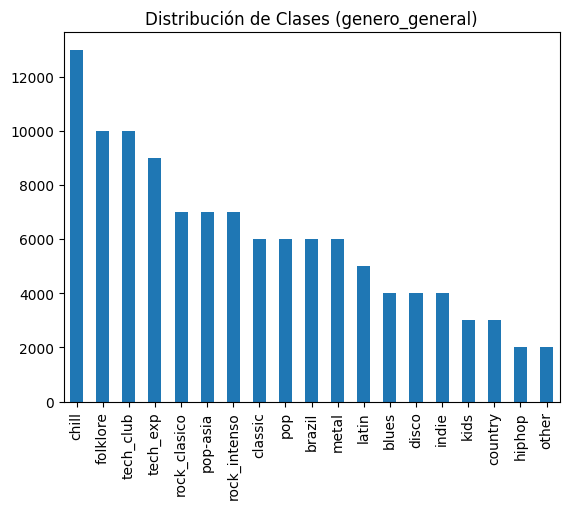

In [117]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.title("Distribución de Clases (genero_general)")
plt.show()


In [116]:
##intentando con random forest
from sklearn.ensemble import RandomForestClassifier
atributos_a_tomar = ['track_name','popularity', 'tempo', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence','key','time_signature','acousticness','duration_ms','track_genre','genero_general']
df_spotify_mod = df_spotify[atributos_a_tomar]
df_filtrado = df_spotify_mod.dropna(subset=['genero_general'])

atributos = [ 'popularity', 'tempo', 'loudness',  'danceability','energy','acousticness','valence','speechiness','duration_ms']

X = df_filtrado[atributos] 
y = df_filtrado['genero_general']

scaler = MinMaxScaler()
X_scaled_2= scaler.fit_transform(X)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_scaled_2, y, test_size=0.2, stratify=y, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=20)
rfc.fit(X_train_3, y_train_3)

y_pred_3 = rfc.predict(X_test_3)
acc_3= accuracy_score(y_test_3, y_pred_3)

print(acc_3)
class_report = classification_report(y_test_3, y_pred_3)
print(class_report)


0.4785964912280702
              precision    recall  f1-score   support

       blues       0.47      0.36      0.41       800
      brazil       0.45      0.62      0.52      1200
       chill       0.45      0.49      0.47      2600
     classic       0.45      0.45      0.45      1200
     country       0.60      0.62      0.61       600
       disco       0.33      0.22      0.26       800
    folklore       0.41      0.41      0.41      2000
      hiphop       0.34      0.12      0.18       400
       indie       0.41      0.28      0.33       800
        kids       0.64      0.47      0.54       600
       latin       0.63      0.60      0.61      1000
       metal       0.60      0.65      0.63      1200
       other       0.64      0.70      0.67       400
         pop       0.47      0.41      0.44      1200
    pop-asia       0.43      0.41      0.42      1400
rock_clasico       0.36      0.33      0.34      1400
rock_intenso       0.41      0.44      0.43      1400
   tech_

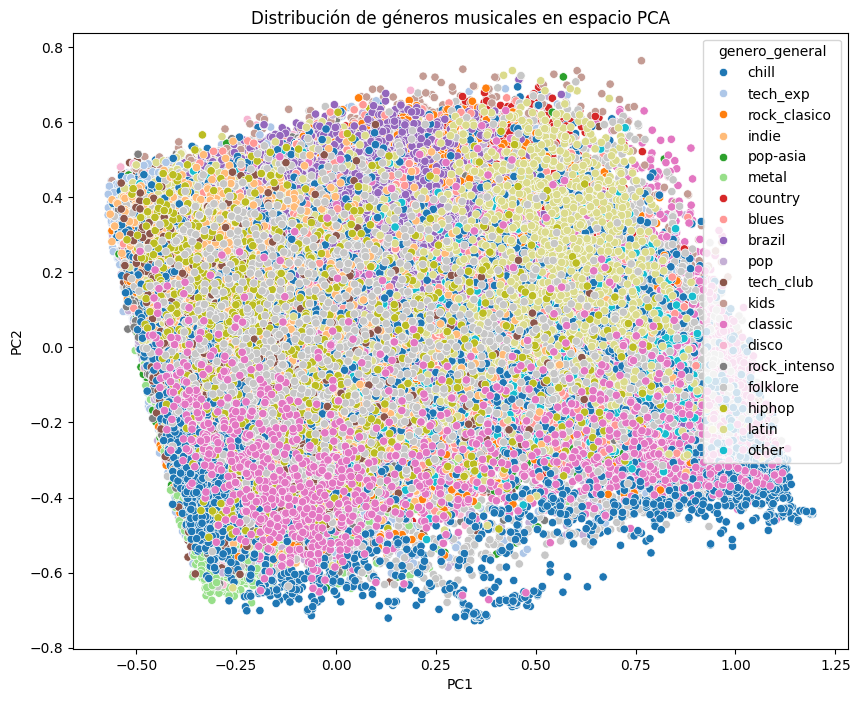

In [118]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_2)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['genero_general'] = y.values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='genero_general', palette='tab20')
plt.title("Distribución de géneros musicales en espacio PCA")
plt.show()


popularity: 0.1384
tempo: 0.1008
loudness: 0.1017
danceability: 0.1123
energy: 0.0979
time_signature: 0.0096
acousticness: 0.1218
valence: 0.1029
speechiness: 0.1040
duration_ms: 0.1105


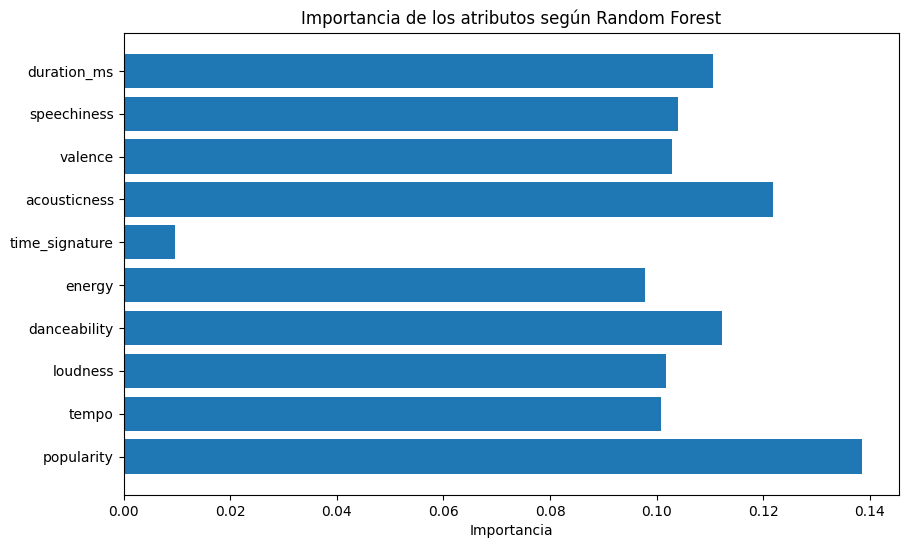

In [115]:
importancias = rfc.feature_importances_

for nombre, importancia in zip(atributos, importancias):
    print(f"{nombre}: {importancia:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(atributos, importancias)
plt.xlabel("Importancia")
plt.title("Importancia de los atributos según Random Forest")
plt.show()

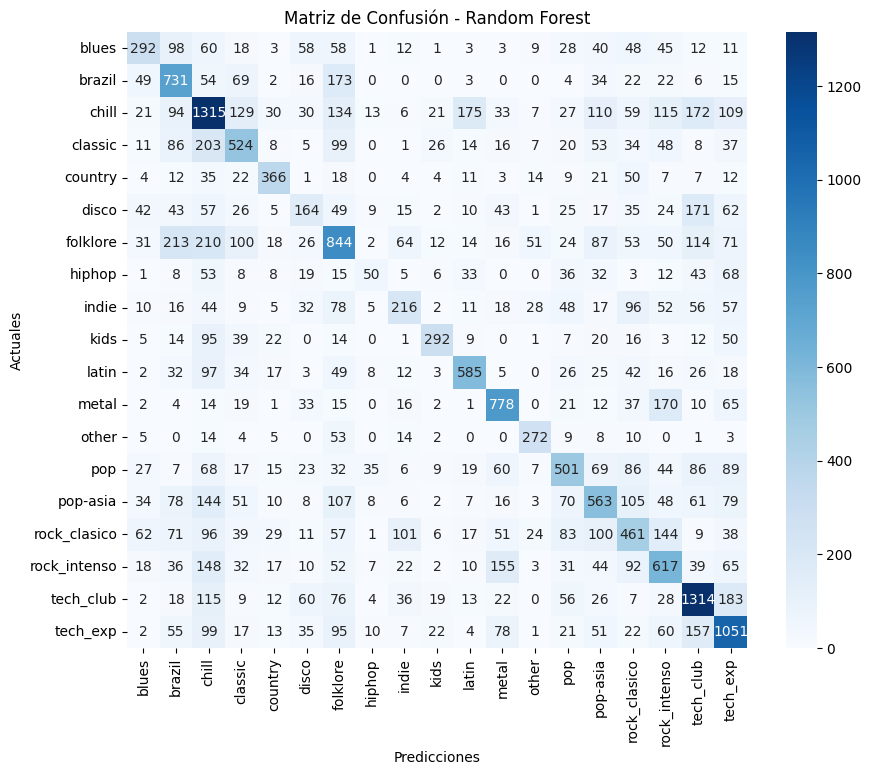

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_3, y_pred_3)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(X_train_3)
x_test_poly = poly.fit_transform(X_test_3)

rfc = RandomForestClassifier(n_estimators=100, max_depth=20)
rfc.fit(x_train_poly, y_train_3)

y_pred_poly = rfc.predict(x_test_poly)
acc= accuracy_score(y_test_3, y_pred_poly)
print(acc)

KeyboardInterrupt: 